# Spatial Data Processing with PySAL & Pandas

> [`IPYNB`](../content/part1/01_data_processing.ipynb)

In [1]:
#by convention, we use these shorter two-letter names
import pysal as ps
import pandas as pd
import numpy as np

PySAL has two simple ways to read in data. But, first, you need to get the path from where your notebook is running on your computer to the place the data is. For example, to find where the notebook is running:

In [2]:
!pwd # on windows !cd

/Users/dani/code/gds_scipy16/content/part1


PySAL has a command that it uses to get the paths of its example datasets. Let's work with a commonly-used dataset first. 

In [3]:
ps.examples.available()

['10740',
 'arcgis',
 'baltim',
 'book',
 'burkitt',
 'calemp',
 'chicago',
 'columbus',
 'desmith',
 'geodanet',
 'juvenile',
 'Line',
 'mexico',
 'nat',
 'networks',
 'newHaven',
 'Point',
 'Polygon',
 'sacramento2',
 'sids2',
 'snow_maps',
 'south',
 'stl',
 'street_net_pts',
 'taz',
 'us_income',
 'virginia',
 'wmat']

In [4]:
ps.examples.explain('us_income')

{'description': 'Per-capita income for the lower 47 US states 1929-2010',
 'explanation': [' * us48.shp: shapefile ',
  ' * us48.dbf: dbf for shapefile',
  ' * us48.shx: index for shapefile',
  ' * usjoin.csv: attribute data (comma delimited file)'],
 'name': 'us_income'}

In [5]:
csv_path = ps.examples.get_path('usjoin.csv')

In [6]:
f = ps.open(csv_path)
f.header[0:10]

['Name',
 'STATE_FIPS',
 '1929',
 '1930',
 '1931',
 '1932',
 '1933',
 '1934',
 '1935',
 '1936']

In [7]:
y2009 = f.by_col('2009')

In [8]:
y2009[0:10]

[32274, 32077, 31493, 40902, 40093, 52736, 40135, 36565, 33086, 30987]

### Working with shapefiles

We can also work with local files outside the built-in examples.

To read in a shapefile, we will need the path to the file.

In [9]:
shp_path = '../data/texas.shp'
print(shp_path)

../data/texas.shp


Then, we open the file using the `ps.open` command:

In [10]:
f = ps.open(shp_path)

`f` is what we call a "file handle." That means that it only *points* to the data and provides ways to work with it. By itself, it does not read the whole dataset into memory. To see basic information about the file, we can use a few different methods. 

For instance, the header of the file, which contains most of the metadata about the file:

In [11]:
f.header

{'BBOX Mmax': 0.0,
 'BBOX Mmin': 0.0,
 'BBOX Xmax': -93.50721740722656,
 'BBOX Xmin': -106.6495132446289,
 'BBOX Ymax': 36.49387741088867,
 'BBOX Ymin': 25.845197677612305,
 'BBOX Zmax': 0.0,
 'BBOX Zmin': 0.0,
 'File Code': 9994,
 'File Length': 49902,
 'Shape Type': 5,
 'Unused0': 0,
 'Unused1': 0,
 'Unused2': 0,
 'Unused3': 0,
 'Unused4': 0,
 'Version': 1000}

To actually read in the shapes from memory, you can use the following commands:

In [12]:
f.by_row(14) #gets the 14th shape from the file

In [13]:
all_polygons = f.read() #reads in all polygons from memory

In [14]:
len(all_polygons)

254

So, all 254 polygons have been read in from file. These are stored in PySAL shape objects, which can be used by PySAL and can be converted to other Python shape objects.

They typically have a few methods. So, since we've read in polygonal data, we can get some properties about the polygons. Let's just have a look at the first polygon:

In [15]:
all_polygons[0:5]

In [16]:
all_polygons[0].centroid #the centroid of the first polygon

(-100.27156110567945, 36.27508640938005)

In [17]:
all_polygons[0].area

0.23682222998468205

In [18]:
all_polygons[0].perimeter

1.9582821721538344

While in the Jupyter Notebook, you can examine what properties an object has by using the tab key.

In [19]:
polygon = all_polygons[0]

In [20]:
polygon. #press tab when the cursor is right after the dot

SyntaxError: invalid syntax (<ipython-input-20-aa03438a2fa8>, line 1)

### Working with Data Tables

In [21]:
dbf_path = "../data/texas.dbf"
print(dbf_path)

../data/texas.dbf


When you're working with tables of data, like a `csv` or `dbf`, you can extract your data in the following way. Let's open the dbf file we got the path for above.

In [22]:
f = ps.open(dbf_path)

Just like with the shapefile, we can examine the header of the dbf file.

In [23]:
f.header

['NAME',
 'STATE_NAME',
 'STATE_FIPS',
 'CNTY_FIPS',
 'FIPS',
 'STFIPS',
 'COFIPS',
 'FIPSNO',
 'SOUTH',
 'HR60',
 'HR70',
 'HR80',
 'HR90',
 'HC60',
 'HC70',
 'HC80',
 'HC90',
 'PO60',
 'PO70',
 'PO80',
 'PO90',
 'RD60',
 'RD70',
 'RD80',
 'RD90',
 'PS60',
 'PS70',
 'PS80',
 'PS90',
 'UE60',
 'UE70',
 'UE80',
 'UE90',
 'DV60',
 'DV70',
 'DV80',
 'DV90',
 'MA60',
 'MA70',
 'MA80',
 'MA90',
 'POL60',
 'POL70',
 'POL80',
 'POL90',
 'DNL60',
 'DNL70',
 'DNL80',
 'DNL90',
 'MFIL59',
 'MFIL69',
 'MFIL79',
 'MFIL89',
 'FP59',
 'FP69',
 'FP79',
 'FP89',
 'BLK60',
 'BLK70',
 'BLK80',
 'BLK90',
 'GI59',
 'GI69',
 'GI79',
 'GI89',
 'FH60',
 'FH70',
 'FH80',
 'FH90']

So, the header is a list containing the names of all of the fields we can read.
If we just wanted to grab the data of interest, `HR90`, we can use either `by_col` or `by_col_array`, depending on the format we want the resulting data in:

In [24]:
HR90 = f.by_col('HR90')
print(type(HR90).__name__, HR90[0:5])
HR90 = f.by_col_array('HR90')
print(type(HR90).__name__, HR90[0:5])

list [0.0, 0.0, 18.31166453, 0.0, 3.6517674554]
ndarray [[  0.        ]
 [  0.        ]
 [ 18.31166453]
 [  0.        ]
 [  3.65176746]]


As you can see, the `by_col` function returns a list of data, with no shape. It can only return one column at a time:

In [25]:
HRs = f.by_col('HR90', 'HR80')

TypeError: __call__() takes 2 positional arguments but 3 were given

This error message is called a "traceback," as you see in the top right, and it usually provides feedback on why the previous command did not execute correctly. Here, you see that one-too-many arguments was provided to `__call__`, which tells us we cannot pass as many arguments as we did to `by_col`.

If you want to read in many columns at once and store them to an array, use `by_col_array`:

In [26]:
HRs = f.by_col_array('HR90', 'HR80')

In [27]:
HRs[0:10]

array([[  0.        ,   0.        ],
       [  0.        ,  10.50199538],
       [ 18.31166453,   5.10386362],
       [  0.        ,   0.        ],
       [  3.65176746,  10.4297038 ],
       [  0.        ,   0.        ],
       [  0.        ,  18.85369532],
       [  2.59514448,   6.33617194],
       [  0.        ,   0.        ],
       [  5.59753708,   6.0331825 ]])

It is best to use `by_col_array` on data of a single type. That is, if you read in a lot of columns, some of them numbers and some of them strings, all columns will get converted to the same datatype:

In [28]:
allcolumns = f.by_col_array(['NAME', 'STATE_NAME', 'HR90', 'HR80'])

In [29]:
allcolumns

array([['Lipscomb', 'Texas', '0.0', '0.0'],
       ['Sherman', 'Texas', '0.0', '10.501995379'],
       ['Dallam', 'Texas', '18.31166453', '5.1038636248'],
       ..., 
       ['Hidalgo', 'Texas', '7.3003167816', '8.2383277607'],
       ['Willacy', 'Texas', '5.6481219994', '7.6212251119'],
       ['Cameron', 'Texas', '12.302014455', '11.761321464']], 
      dtype='<U13')

Note that the numerical columns, `HR90` & `HR80` are now considered strings, since they show up with the single tickmarks around them, like `'0.0'`.

These methods work similarly for `.csv` files as well.

### Using Pandas with PySAL

A new functionality added to PySAL recently allows you to work with shapefile/dbf pairs using Pandas. This *optional* extension is only turned on if you have Pandas installed. The extension is the `ps.pdio` module:

In [30]:
ps.pdio

<module 'pysal.contrib.pdutilities' from '/Users/dani/anaconda/envs/gds-scipy16/lib/python3.5/site-packages/pysal/contrib/pdutilities/__init__.py'>

To use it, you can read in shapefile/dbf pairs using the `ps.pdio.read_files` command. 

In [31]:
shp_path = ps.examples.get_path('NAT.shp')
data_table = ps.pdio.read_files(shp_path)

This reads in *the entire database table* and adds a column to the end, called `geometry`, that stores the geometries read in from the shapefile. 

Now, you can work with it like a standard pandas dataframe.

In [32]:
data_table.head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,Lake of the Woods,Minnesota,27,077,27077,27,77,27077,0,0.000000,...,0.024534,0.285235,0.372336,0.342104,0.336455,11.279621,5.4,5.663881,9.515860,<pysal.cg.shapes.Polygon object at 0x104125ef0>
1,Ferry,Washington,53,019,53019,53,19,53019,0,0.000000,...,0.317712,0.256158,0.360665,0.361928,0.360640,10.053476,2.6,10.079576,11.397059,<pysal.cg.shapes.Polygon object at 0x10d8ba390>
2,Stevens,Washington,53,065,53065,53,65,53065,0,1.863863,...,0.210030,0.283999,0.394083,0.357566,0.369942,9.258437,5.6,6.812127,10.352015,<pysal.cg.shapes.Polygon object at 0x104142400>
3,Okanogan,Washington,53,047,53047,53,47,53047,0,2.612330,...,0.155922,0.258540,0.371218,0.381240,0.394519,9.039900,8.1,10.084926,12.840340,<pysal.cg.shapes.Polygon object at 0x10dadd5c0>
4,Pend Oreille,Washington,53,051,53051,53,51,53051,0,0.000000,...,0.134605,0.243263,0.365614,0.358706,0.387848,8.243930,4.1,7.557643,10.313002,<pysal.cg.shapes.Polygon object at 0x10dadd630>


The `read_files` function only works on shapefile/dbf pairs. If you need to read in data using CSVs, use pandas directly:

In [33]:
usjoin = pd.read_csv(csv_path)
#usjoin = ps.pdio.read_files(csv_path) #will not work, not a shp/dbf pair

In [34]:
usjoin.head()

,Name,STATE_FIPS,1929,1930,1931,1932,1933,1934,1935,1936,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,Alabama,1,323,267,224,162,166,211,217,251,...,23471,24467,25161,26065,27665,29097,30634,31988,32819,32274
1,Arizona,4,600,520,429,321,308,362,416,462,...,25578,26232,26469,27106,28753,30671,32552,33470,33445,32077
2,Arkansas,5,310,228,215,157,157,187,207,247,...,22257,23532,23929,25074,26465,27512,29041,31070,31800,31493
3,California,6,991,887,749,580,546,603,660,771,...,32275,32750,32900,33801,35663,37463,40169,41943,42377,40902
4,Colorado,8,634,578,471,354,353,368,444,542,...,32949,34228,33963,34092,35543,37388,39662,41165,41719,40093


The nice thing about working with pandas dataframes is that they have very powerful baked-in support for relational-style queries. By this, I mean that it is very easy to find things like:

The number of counties in each state:

In [35]:
data_table.groupby("STATE_NAME").size()

STATE_NAME
Alabama                  67
Arizona                  14
Arkansas                 75
California               58
Colorado                 63
Connecticut               8
Delaware                  3
District of Columbia      1
Florida                  67
Georgia                 159
Idaho                    44
Illinois                102
Indiana                  92
Iowa                     99
Kansas                  105
Kentucky                120
Louisiana                64
Maine                    16
Maryland                 24
Massachusetts            12
Michigan                 83
Minnesota                87
Mississippi              82
Missouri                115
Montana                  55
Nebraska                 93
Nevada                   17
New Hampshire            10
New Jersey               21
New Mexico               32
New York                 58
North Carolina          100
North Dakota             53
Ohio                     88
Oklahoma                 77
Oregon   

Or, to get the rows of the table that are in Arizona, we can use the `query` function of the dataframe:

In [36]:
data_table.query('STATE_NAME == "Arizona"')

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
1707,Navajo,Arizona,04,017,04017,4,17,4017,0,5.263989,...,0.905251,0.366863,0.414135,0.401999,0.445299,13.146998,12.1,13.762783,18.033782,<pysal.cg.shapes.Polygon object at 0x10e280080>
1708,Coconino,Arizona,04,005,04005,4,5,4005,0,3.185449,...,1.469081,0.301222,0.377785,0.381655,0.403188,9.475171,8.5,11.181563,15.267643,<pysal.cg.shapes.Polygon object at 0x10e2800f0>
1722,Mohave,Arizona,04,015,04015,4,15,4015,0,0.000000,...,0.324075,0.279339,0.347150,0.375790,0.374383,11.508554,4.8,7.018268,9.214294,<pysal.cg.shapes.Polygon object at 0x10e280710>
1726,Apache,Arizona,04,001,04001,4,1,4001,0,10.951223,...,0.162361,0.395913,0.450552,0.431013,0.489132,15.014738,14.6,18.727548,22.933635,<pysal.cg.shapes.Polygon object at 0x10e2808d0>
2002,Yavapai,Arizona,04,025,04025,4,25,4025,0,3.458771,...,0.298011,0.289509,0.378195,0.376313,0.384089,9.930032,8.6,7.516372,9.483521,<pysal.cg.shapes.Polygon object at 0x10e394518>
2182,Gila,Arizona,04,007,04007,4,7,4007,0,6.473749,...,0.246171,0.265294,0.337519,0.353848,0.386976,10.470261,8.1,9.934237,11.706102,<pysal.cg.shapes.Polygon object at 0x10e4500b8>
2262,Maricopa,Arizona,04,013,04013,4,13,4013,0,6.179259,...,3.499221,0.277828,0.352374,0.366015,0.372756,10.642382,9.8,11.857260,14.404902,<pysal.cg.shapes.Polygon object at 0x10e49d438>
2311,Greenlee,Arizona,04,011,04011,4,11,4011,0,2.896284,...,0.349650,0.177691,0.257158,0.283518,0.337256,9.806115,6.7,5.295110,10.453284,<pysal.cg.shapes.Polygon object at 0x10e4c1a58>
2326,Graham,Arizona,04,009,04009,4,9,4009,0,4.746648,...,1.890487,0.310256,0.362926,0.383554,0.408379,11.979335,10.1,11.961367,16.129032,<pysal.cg.shapes.Polygon object at 0x10e4ea128>
2353,Pinal,Arizona,04,021,04021,4,21,4021,0,13.828390,...,3.134586,0.304294,0.369974,0.361193,0.400130,10.822965,8.8,10.341699,15.304144,<pysal.cg.shapes.Polygon object at 0x10e4ead68>


Behind the scenes, this uses a fast vectorized library, `numexpr`, to essentially do the following. 

First, compare each row's `STATE_NAME` column to `'Arizona'` and return `True` if the row matches:

In [37]:
data_table.STATE_NAME == 'Arizona'

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
3055    False
3056    False
3057    False
3058    False
3059    False
3060    False
3061    False
3062    False
3063    False
3064    False
3065    False
3066    False
3067    False
3068    False
3069    False
3070    False
3071    False
3072    False
3073    False
3074    False
3075    False
3076    False
3077    False
3078    False
3079    False
3080     True
3081    False
3082    False
3083    False
3084    False
Name: STATE_NAME, dtype: bool

Then, use that to filter out rows where the condition is true:

In [38]:
data_table[data_table.STATE_NAME == 'Arizona']

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
1707,Navajo,Arizona,04,017,04017,4,17,4017,0,5.263989,...,0.905251,0.366863,0.414135,0.401999,0.445299,13.146998,12.1,13.762783,18.033782,<pysal.cg.shapes.Polygon object at 0x10e280080>
1708,Coconino,Arizona,04,005,04005,4,5,4005,0,3.185449,...,1.469081,0.301222,0.377785,0.381655,0.403188,9.475171,8.5,11.181563,15.267643,<pysal.cg.shapes.Polygon object at 0x10e2800f0>
1722,Mohave,Arizona,04,015,04015,4,15,4015,0,0.000000,...,0.324075,0.279339,0.347150,0.375790,0.374383,11.508554,4.8,7.018268,9.214294,<pysal.cg.shapes.Polygon object at 0x10e280710>
1726,Apache,Arizona,04,001,04001,4,1,4001,0,10.951223,...,0.162361,0.395913,0.450552,0.431013,0.489132,15.014738,14.6,18.727548,22.933635,<pysal.cg.shapes.Polygon object at 0x10e2808d0>
2002,Yavapai,Arizona,04,025,04025,4,25,4025,0,3.458771,...,0.298011,0.289509,0.378195,0.376313,0.384089,9.930032,8.6,7.516372,9.483521,<pysal.cg.shapes.Polygon object at 0x10e394518>
2182,Gila,Arizona,04,007,04007,4,7,4007,0,6.473749,...,0.246171,0.265294,0.337519,0.353848,0.386976,10.470261,8.1,9.934237,11.706102,<pysal.cg.shapes.Polygon object at 0x10e4500b8>
2262,Maricopa,Arizona,04,013,04013,4,13,4013,0,6.179259,...,3.499221,0.277828,0.352374,0.366015,0.372756,10.642382,9.8,11.857260,14.404902,<pysal.cg.shapes.Polygon object at 0x10e49d438>
2311,Greenlee,Arizona,04,011,04011,4,11,4011,0,2.896284,...,0.349650,0.177691,0.257158,0.283518,0.337256,9.806115,6.7,5.295110,10.453284,<pysal.cg.shapes.Polygon object at 0x10e4c1a58>
2326,Graham,Arizona,04,009,04009,4,9,4009,0,4.746648,...,1.890487,0.310256,0.362926,0.383554,0.408379,11.979335,10.1,11.961367,16.129032,<pysal.cg.shapes.Polygon object at 0x10e4ea128>
2353,Pinal,Arizona,04,021,04021,4,21,4021,0,13.828390,...,3.134586,0.304294,0.369974,0.361193,0.400130,10.822965,8.8,10.341699,15.304144,<pysal.cg.shapes.Polygon object at 0x10e4ead68>


We might need this behind the scenes knowledge when we want to chain together conditions, or when we need to do spatial queries. 

This is because spatial queries are somewhat more complex. Let's say, for example, we want all of the counties in the US to the West of `-121` longitude. We need a way to express that question. Ideally, we want something like:

```
SELECT
        *
FROM
        data_table
WHERE
        x_centroid < -121
```

So, let's refer to an arbitrary polygon in the the dataframe's geometry column as `poly`. The centroid of a PySAL polygon is stored as an `(X,Y)` pair, so the longitude is the first element of the pair, `poly.centroid[0]`. 

Then, applying this condition to each geometry, we get the same kind of filter we used above to grab only counties in Arizona:

In [65]:
data_table.geometry.apply(lambda x: x.centroid[0] < -121)\
                   .head()

0    False
1    False
2    False
3    False
4    False
Name: geometry, dtype: bool

If we use this as a filter on the table, we can get only the rows that match that condition, just like we did for the `STATE_NAME` query:

In [40]:
data_table[data_table.geometry.apply(lambda x: x.centroid[0] < -119)].head()

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
3,Okanogan,Washington,53,047,53047,53,47,53047,0,2.612330,...,0.155922,0.258540,0.371218,0.381240,0.394519,9.039900,8.1,10.084926,12.840340,<pysal.cg.shapes.Polygon object at 0x10dadd5c0>
27,Whatcom,Washington,53,073,53073,53,73,53073,0,1.422131,...,0.508687,0.247630,0.346935,0.369436,0.358418,9.174415,7.1,9.718054,11.135022,<pysal.cg.shapes.Polygon object at 0x10df05080>
31,Skagit,Washington,53,057,53057,53,57,53057,0,2.596560,...,0.351958,0.239346,0.344830,0.364623,0.362265,8.611518,7.9,10.480031,11.382484,<pysal.cg.shapes.Polygon object at 0x10df05240>
42,Chelan,Washington,53,007,53007,53,7,53007,0,4.908698,...,0.153110,0.246292,0.367681,0.374505,0.383486,8.787907,8.1,9.968454,12.236493,<pysal.cg.shapes.Polygon object at 0x10df05710>
44,Clallam,Washington,53,009,53009,53,9,53009,0,3.330891,...,0.568504,0.240573,0.349320,0.361619,0.366854,8.788882,6.5,9.660900,12.281690,<pysal.cg.shapes.Polygon object at 0x10df057f0>


In [41]:
len(data_table[data_table.geometry.apply(lambda x: x.centroid[0] < -119)]) #how many west of -119?

109

## Other types of spatial queries

Everybody knows the following statements are true:

1. If you head directly west from Reno, Nevada, you will shortly enter California.
2. San Diego is in California.

But what does this tell us about the location of San Diego relative to Reno?

Or for that matter, how many counties in California are to the east of Reno?





In [42]:
geom = data_table.query('(NAME == "Washoe") & (STATE_NAME == "Nevada")').geometry

In [43]:
lon,lat = geom.values[0].centroid

In [44]:
lon

-119.6555030699793

In [45]:
cal_counties = data_table.query('(STATE_NAME=="California")')

In [46]:
cal_counties[cal_counties.geometry.apply(lambda x: x.centroid[0] > lon)]

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
1312,Mono,California,06,051,06051,6,51,6051,0,15.062509,...,0.431900,0.229888,0.327520,0.388414,0.366316,6.743421,6.6,8.187135,10.083699,<pysal.cg.shapes.Polygon object at 0x10dfd5e48>
1591,Fresno,California,06,019,06019,6,19,6019,0,5.192037,...,5.007266,0.286651,0.379884,0.394981,0.412947,11.788963,11.8,13.998747,18.523541,<pysal.cg.shapes.Polygon object at 0x10e0ecc50>
1620,Inyo,California,06,027,06027,6,27,6027,0,8.558713,...,0.432143,0.242293,0.334361,0.353784,0.378516,9.676365,8.1,8.480065,12.067279,<pysal.cg.shapes.Polygon object at 0x10e220940>
1765,Tulare,California,06,107,06107,6,107,6107,0,3.364944,...,1.480503,0.303303,0.380229,0.395059,0.410811,10.398757,9.5,11.957928,16.303423,<pysal.cg.shapes.Polygon object at 0x10e2a4a58>
1956,Kern,California,06,029,06029,6,29,6029,0,6.393044,...,5.544117,0.273083,0.364603,0.380617,0.395393,10.225236,10.4,12.037755,16.118827,<pysal.cg.shapes.Polygon object at 0x10e348fd0>
1957,San Bernardino,California,06,071,06071,6,71,6071,0,3.243373,...,8.103188,0.259038,0.350927,0.362389,0.372659,9.857519,10.0,12.999831,15.403925,<pysal.cg.shapes.Polygon object at 0x10e36f080>
2117,Ventura,California,06,111,06111,6,111,6111,0,3.180374,...,2.336118,0.259643,0.325908,0.350430,0.329175,10.304761,8.9,11.047165,12.044930,<pysal.cg.shapes.Polygon object at 0x10e40c390>
2255,Riverside,California,06,065,06065,6,65,6065,0,4.898903,...,5.433210,0.284000,0.376737,0.383226,0.368177,9.769959,9.2,11.145612,12.678340,<pysal.cg.shapes.Polygon object at 0x10e49d128>
2279,Orange,California,06,059,06059,6,59,6059,0,2.083555,...,1.770587,0.255864,0.316731,0.355117,0.330447,8.802545,9.1,12.405423,12.974648,<pysal.cg.shapes.Polygon object at 0x10e49dc18>
2344,San Diego,California,06,073,06073,6,73,6073,0,2.387842,...,6.377301,0.269147,0.352428,0.382815,0.368301,11.425041,11.5,14.384523,15.489702,<pysal.cg.shapes.Polygon object at 0x10e4ea908>


In [47]:
len(cal_counties)

58

This works on any type of spatial query. 

For instance, if we wanted to find all of the counties that are within a threshold distance from an observation's centroid, we can do it in the following way. 

But first, we need to handle distance calculations on the earth's surface.

In [48]:
from math import radians, sin, cos, sqrt, asin

def gcd(loc1, loc2, R=3961):
    """Great circle distance via Haversine formula
    
    Parameters
    ----------
    
    loc1: tuple (long, lat in decimal degrees)
    
    loc2: tuple (long, lat in decimal degrees)
    
    R: Radius of the earth (3961 miles, 6367 km)
    
    Returns
    -------
    great circle distance between loc1 and loc2 in units of R
    
    
    Notes
    ------
    Does not take into account non-spheroidal shape of the Earth
    
    
    
    >>> san_diego = -117.1611, 32.7157
    >>> austin = -97.7431, 30.2672
    >>> gcd(san_diego, austin)
    1155.474644164695
  
    
    """
    lon1, lat1 = loc1
    lon2, lat2 = loc2
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
 
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))

    return R * c
 
def gcdm(loc1, loc2):
    return gcd(loc1, loc2)

def gcdk(loc1, loc2):
    return gcd(loc1, loc2, 6367 )

In [49]:
san_diego = -117.1611, 32.7157
austin = -97.7431, 30.2672
gcd(san_diego, austin)

1155.474644164695

In [50]:
gcdk(san_diego, austin)

1857.3357887898544

In [51]:
loc1 = (-117.1611, 0.0)
loc2 = (-118.1611, 0.0)
gcd(loc1, loc2)

69.13249167149539

In [52]:
loc1 = (-117.1611, 45.0)
loc2 = (-118.1611, 45.0)
gcd(loc1, loc2)

48.88374342930467

In [53]:
loc1 = (-117.1611, 89.0)
loc2 = (-118.1611, 89.0)
gcd(loc1, loc2)

1.2065130336642724

In [54]:
lats = range(0, 91)
onedeglon = [ gcd((-117.1611,lat),(-118.1611,lat)) for lat in lats]

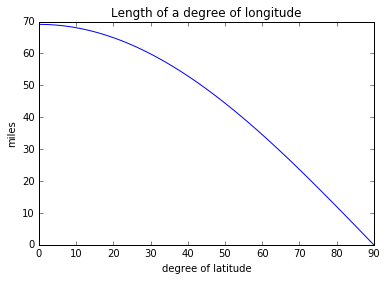

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(lats, onedeglon)
plt.ylabel('miles')
plt.xlabel('degree of latitude')
plt.title('Length of a degree of longitude')

In [56]:
san_diego = -117.1611, 32.7157
austin = -97.7431, 30.2672
gcd(san_diego, austin)

1155.474644164695

Now we can use our distance function to pose distance-related queries on our data table.

In [57]:
# Find all the counties with centroids within 50 miles of Austin
def near_target_point(polygon, target=austin, threshold=50):
    return gcd(polygon.centroid, target) < threshold 

data_table[data_table.geometry.apply(near_target_point)]

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
2698,Burnet,Texas,48,053,48053,48,53,48053,1,0.000000,...,1.186224,0.327508,0.449285,0.385079,0.405890,10.774142,6.5,7.115629,10.568742,<pysal.cg.shapes.Polygon object at 0x10e6567f0>
2716,Williamson,Texas,48,491,48491,48,491,48491,1,9.511852,...,4.916482,0.363603,0.379902,0.341976,0.345201,13.532731,9.0,7.582572,12.032589,<pysal.cg.shapes.Polygon object at 0x10e656fd0>
2742,Travis,Texas,48,453,48453,48,453,48453,1,4.242561,...,10.959791,0.299292,0.372293,0.378953,0.388149,12.976379,10.9,14.459691,17.307113,<pysal.cg.shapes.Polygon object at 0x10e67eba8>
2751,Lee,Texas,48,287,48287,48,287,48287,1,7.449622,...,13.847829,0.376002,0.433132,0.394000,0.394959,12.305699,10.1,8.875542,10.530896,<pysal.cg.shapes.Polygon object at 0x10e67eef0>
2754,Blanco,Texas,48,031,48031,48,31,48031,1,0.000000,...,0.937709,0.369814,0.436449,0.394609,0.394414,9.365854,6.0,8.074074,9.080119,<pysal.cg.shapes.Polygon object at 0x10e6aa160>
2762,Bastrop,Texas,48,021,48021,48,21,48021,1,3.938946,...,11.792071,0.370264,0.419933,0.390927,0.380907,14.747191,12.5,10.559006,12.281387,<pysal.cg.shapes.Polygon object at 0x10e6aa518>
2769,Hays,Texas,48,209,48209,48,209,48209,1,5.016555,...,3.383424,0.385061,0.424973,0.378992,0.372266,13.064187,9.4,10.003691,10.337188,<pysal.cg.shapes.Polygon object at 0x10e6aa908>
2795,Caldwell,Texas,48,055,48055,48,55,48055,1,9.677544,...,10.704001,0.380080,0.412614,0.410802,0.413940,15.229616,10.5,12.894034,17.191502,<pysal.cg.shapes.Polygon object at 0x10e6d04a8>
2798,Comal,Texas,48,091,48091,48,91,48091,1,3.359538,...,0.854684,0.274182,0.359174,0.375810,0.380032,11.315107,7.6,8.693149,9.104427,<pysal.cg.shapes.Polygon object at 0x10e6d05f8>
2808,Guadalupe,Texas,48,187,48187,48,187,48187,1,5.743759,...,5.649500,0.340374,0.388821,0.354559,0.378073,11.758921,9.6,10.418149,12.918448,<pysal.cg.shapes.Polygon object at 0x10e6d0a58>


### Moving in and out of the dataframe

Most things in PySAL will be explicit about what type their input should be. Most of the time, PySAL functions require either lists or arrays. This is why the file-handler methods are the default IO method in PySAL: the rest of the computational tools are built around their datatypes. 

However, it is very easy to get the correct datatype from Pandas using the `values` and `tolist` commands. 

`tolist()` will convert its entries to a list. But, it can only be called on individual columns (called `Series` in `pandas` documentation).

So, to turn the `NAME` column into a list:

In [58]:
data_table.NAME.tolist()[0:10]

['Lake of the Woods',
 'Ferry',
 'Stevens',
 'Okanogan',
 'Pend Oreille',
 'Boundary',
 'Lincoln',
 'Flathead',
 'Glacier',
 'Toole']

To extract many columns, you must select the columns you want and call their `.values` attribute. 

If we were interested in grabbing all of the `HR` variables in the dataframe, we could first select those column names:

In [59]:
HRs = [col for col in data_table.columns if col.startswith('HR')]
HRs

['HR60', 'HR70', 'HR80', 'HR90']

We can use this to focus only on the columns we want:

In [61]:
data_table[HRs].head()

,HR60,HR70,HR80,HR90
0,0.000000,0.000000,8.855827,0.000000
1,0.000000,0.000000,17.208742,15.885624
2,1.863863,1.915158,3.450775,6.462453
3,2.612330,1.288643,3.263814,6.996502
4,0.000000,0.000000,7.770008,7.478033


With this, calling `.values` gives an array containing all of the entries in this subset of the table:

In [99]:
data_table[['HR90', 'HR80']].values

array([[  0.        ,   8.85582713],
       [ 15.88562351,  17.20874204],
       [  6.46245315,   3.4507747 ],
       ..., 
       [  4.36732988,   5.2803488 ],
       [  3.72771194,   3.00003   ],
       [  2.04885495,   1.19474313]])

Using the PySAL pdio tools means that if you're comfortable with working in Pandas, you can continue to do so. 

If you're more comfortable using Numpy or raw Python to do your data processing, PySAL's IO tools naturally support this. 

## Exercises

1. Find the county with the western most centroid that is within 1000 miles of Austin.
2. Find the distance between Austin and that centroid.